In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import scipy.sparse as sp

from DataParser import DataParser
from Base.Evaluation.Evaluator import EvaluatorHoldout
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender 
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

In [2]:
parser = DataParser()
URM_all = parser.get_URM_all()

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.80)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train, train_percentage = 0.85)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

### number of neighbors

In [3]:
MAP_per_k = []
x_tick = []

In [4]:
x_tick_n = [10,20,30,50,100,200,300,500,700,900]
for topK in x_tick_n:
    
    recommender = ItemKNNCFRecommender(URM_train)
    recommender.fit(shrink=30, topK=topK)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_k.append(result_dict[10]["MAP"])
    x_tick.append(topK)

ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8262.22 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 2.71 sec. Users per second: 2088
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8716.99 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 2.73 sec. Users per second: 2076
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8741.42 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 2.76 sec. Users per second: 2054
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 873

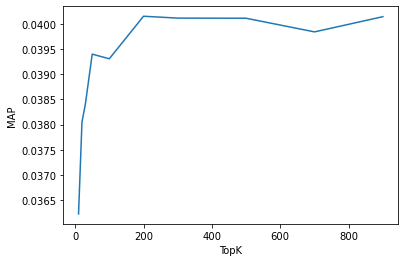

In [5]:
plt.plot(x_tick, MAP_per_k)
plt.ylabel('MAP')
plt.xlabel('TopK')
plt.show()

In [6]:
x_tick = [0, 10, 50, 100, 200,300,400, 500]
MAP_per_shrinkage = []

for shrink in x_tick:
    
    recommender = ItemKNNCFRecommender(URM_train)
    recommender.fit(shrink=shrink, topK=300)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_shrinkage.append(result_dict[10]["MAP"])

ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 7949.20 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.06 sec. Users per second: 1852
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8317.98 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.05 sec. Users per second: 1855
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8488.22 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.10 sec. Users per second: 1830
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 843

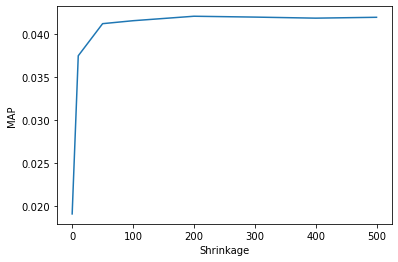

In [8]:
plt.plot(x_tick, MAP_per_shrinkage)
plt.ylabel('MAP')
plt.xlabel('Shrinkage')
plt.show()

In [10]:
similarities = ['cosine', 'jaccard', 'tanimoto', 'dice', 'pearson']
MAP_per_similarity = []

for s in similarities:
    recommender = ItemKNNCFRecommender(URM_train)
    recommender.fit(shrink=250, topK=300, similarity=s)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_similarity.append(result_dict[10]["MAP"])

ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8165.64 column/sec, elapsed time 0.05 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.15 sec. Users per second: 1797
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 7551.66 column/sec, elapsed time 0.06 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 4.12 sec. Users per second: 1377
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 7274.46 column/sec, elapsed time 0.06 min
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.65 sec. Users per second: 1553
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 781

In [12]:
MAP_per_similarity

[0.04197941023848327,
 0.04170410551033527,
 0.04170410551033527,
 0.04168512583844297,
 0.00014457333389372224]

In [15]:
recommender = ItemKNNCFRecommender(URM_train)
recommender.fit(shrink=250, topK=300)
print('None:')
result_dict, _ = evaluator_test.evaluateRecommender(recommender)
print(result_dict[10]['MAP'])

ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 7990.44 column/sec, elapsed time 0.05 min
None:
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.15 sec. Users per second: 1798
0.04197941023848327


In [14]:
recommender = ItemKNNCFRecommender(URM_train)
recommender.fit(shrink=250, topK=300, feature_weighting='TF-IDF')
print('TF-IDF:')
result_dict, _ = evaluator_test.evaluateRecommender(recommender)
print(result_dict[10]['MAP'])

recommender = ItemKNNCFRecommender(URM_train)
recommender.fit(shrink=250, topK=300, feature_weighting='BM25')
print('BM25:')    
result_dict, _ = evaluator_test.evaluateRecommender(recommender)
print(result_dict[10]['MAP'])


    

ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 8103.76 column/sec, elapsed time 0.05 min
TF-IDF:
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.12 sec. Users per second: 1816
0.03876708480129644
ItemKNNCFRecommender: URM Detected 185 (2.33 %) cold users.
ItemKNNCFRecommender: URM Detected 3583 (13.79 %) cold items.
Similarity column 25975 ( 100 % ), 7675.92 column/sec, elapsed time 0.06 min
BM25:
EvaluatorHoldout: Processed 5665 ( 100.00% ) in 3.24 sec. Users per second: 1748
0.019846772576835


---

In [2]:
from DataParser import DataParser
from datetime import datetime

from Data_manager.split_functions.split_train_validation_random_holdout import \
    split_train_in_two_percentage_global_sample
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from SLIM_ElasticNet.SLIMElasticNetRecommender import SLIMElasticNetRecommender
import numpy as np
import scipy.sparse as sps
import pandas as pd
import re

In [3]:
seed = 1205

parser = DataParser()
URM_all = parser.get_URM_all()

In [4]:
recommender_slim = SLIMElasticNetRecommender(URM_all)
recommender_slim.fit(topK=120, l1_ratio=1e-5, alpha=0.066)

SLIMElasticNetRecommender: URM Detected 1079 (4.15 %) cold items.
SLIMElasticNetRecommender: Processed 11987 ( 46.15% ) in 5.00 min. Items per second: 39.95
SLIMElasticNetRecommender: Processed 24591 ( 94.67% ) in 10.00 min. Items per second: 40.98
SLIMElasticNetRecommender: Processed 25975 ( 100.00% ) in 10.53 min. Items per second: 41.11


In [5]:
def create_csv(parser, recommender, name=None):

    out_userid = np.array([])
    out_itemlist = np.array([])

    target_data = parser.get_target_data()
    for user_id in target_data.user_id.unique():
        out_userid = np.append(out_userid, user_id)
        recommendation = recommender.recommend(user_id, cutoff=10)
        #print(type(recommendation))
        str_ = re.sub(' +', ' ', np.array_str(np.array(recommendation)))[1:-1]
        if str_[0] == ' ':
            str_ = str_[1:]
        #print(str_)
        out_itemlist = np.append(out_itemlist, str_)

    out_dataframe = pd.DataFrame(data={'user_id':out_userid, 'item_list':out_itemlist})
    out_dataframe = out_dataframe.astype({'user_id': 'int32'})

    filename = str(datetime.now().strftime("res_%Y%m%d-%H%M.csv"))
    if not name is None:
        name = name + '_' + filename
    else:
        name = filename
    out_path = "res_csv/" + name
    out_dataframe.to_csv(out_path, index=False)

    # remove the single line added
    fd = open(out_path, "r")
    d = fd.read()
    fd.close()
    m = d.split("\n")
    s = "\n".join(m[:-1])
    fd = open(out_path, "w+")
    for i in range(len(s)):
        fd.write(s[i])
    fd.close()

In [6]:
create_csv(parser, recommender_slim, 'SLIM_Elasticnet')

<class 'list'>
1447 4927 5085 25878 637 15830 8486 19062 1789 19197
<class 'list'>
19089 23600 12409 19709 20095 3165 16630 19480 8431 17257
<class 'list'>
25693 3164 18790 1876 16901 6662 19899 13144 13658 1007
<class 'list'>
12473 22487 20905 18569 5412 17820 24093 4175 18374 25892
<class 'list'>
1611 9243 11384 19704 9007 18692 11067 4927 11796 13427
<class 'list'>
8097 7494 19709 12214 4257 11535 22121 17819 20095 8322
<class 'list'>
24383 25044 23906 4824 14356 13102 24994 1848 18173 15130
<class 'list'>
4209 19189 22862 23155 11159 9081 21582 5665 1532 1467
<class 'list'>
25407 1583 6878 15691 23154 2426 10834 18392 21123 10594
<class 'list'>
9609 23600 19089 15562 13615 20897 13944 25779 19346 8785
<class 'list'>
3556 22923 23361 23026 18751 3070 23919 21278 14150 12375
<class 'list'>
22956 7856 3220 12788 12890 23403 17540 22571 5833 1817
<class 'list'>
2823 18790 5546 2173 7796 24007 1592 20211 2281 12494
<class 'list'>
20969 25407 6446 17229 22121 19468 12601 6734 16772 15691

<class 'list'>
16577 12601 11197 5930 12943 22731 17877 625 306 22121
<class 'list'>
16577 22731 21042 14328 10951 3913 1022 8990 5044 16942
<class 'list'>
6088 22359 22646 15459 13541 9591 14418 24075 9851 21552
<class 'list'>
91 14838 19063 22981 17884 22010 7898 17857 23647 11896
<class 'list'>
23417 6759 5497 20750 11451 3804 25683 752 4811 16957
<class 'list'>
10513 21802 11597 6616 18799 15330 13756 3689 15905 10005
<class 'list'>
20308 10730 588 19822 21920 25596 2570 2081 11475 11832
<class 'list'>
6121 10996 4766 11925 10396 24481 11369 10002 3782 21780
<class 'list'>
1397 18499 17680 16443 14551 18060 8529 20636 20644 7487
<class 'list'>
11832 6952 9018 5581 10249 10418 14395 574 24210 22313
<class 'list'>
25675 24075 14684 9438 5078 4502 18293 20308 5942 10269
<class 'list'>
5487 9284 23536 1785 18190 999 7885 2868 3255 16966
<class 'list'>
2426 10594 1583 7991 18392 5044 6734 12818 17156 4878
<class 'list'>
18293 22750 24230 21773 24216 15915 561 6294 1366 5380
<class 'list

<class 'list'>
11533 25407 8860 10834 2426 23154 5952 15691 12050 13928
<class 'list'>
10269 25675 5942 22554 10786 12061 9851 23799 13118 15564
<class 'list'>
7153 1805 8826 18722 3341 22045 24069 25040 24618 11557
<class 'list'>
3037 4936 497 18793 5032 12048 14684 9662 13609 10544
<class 'list'>
9438 25675 13118 19089 12061 17525 13433 9851 3165 22554
<class 'list'>
19874 14684 4502 20308 24355 1714 15363 6612 8304 24484
<class 'list'>
17820 5412 4803 6897 24109 11153 10807 57 8311 15125
<class 'list'>
25459 8383 18662 20979 3070 25786 11452 4011 17889 8478
<class 'list'>
25407 16772 8990 2426 17229 23154 13226 10594 9555 16928
<class 'list'>
2426 25407 23154 18452 18392 13711 1583 23141 9555 10834
<class 'list'>
19393 22617 25668 17813 1863 13352 9591 9851 20950 9558
<class 'list'>
24093 18122 15764 16857 9187 15583 3148 24484 8304 17820
<class 'list'>
24075 10786 25675 9851 5942 10269 25693 22554 15564 18293
<class 'list'>
2420 10567 8947 5167 18095 20771 4723 9304 20598 1968
<cla

<class 'list'>
4055 5746 11796 24167 2795 756 16453 13718 3185 1051
<class 'list'>
5469 21061 4147 13294 6164 3803 13887 22564 7550 1064
<class 'list'>
9224 16775 8131 22406 9637 6878 14689 18890 16583 22402
<class 'list'>
3744 22121 5469 21061 22564 1846 1869 19769 20422 6164
<class 'list'>
15691 23154 5952 10834 9555 11533 10594 5044 1583 2492
<class 'list'>
20176 18591 11812 3980 24751 7464 3581 17421 17441 10628
<class 'list'>
6612 15157 7494 17012 22500 11900 13663 17723 12992 19670
<class 'list'>
19089 7494 17723 14895 12409 19709 23600 17760 14978 13352
<class 'list'>
1810 23983 3659 11366 21877 508 11835 23966 25222 8864
<class 'list'>
8599 18212 6799 19141 8842 4188 22621 1414 3188 15556
<class 'list'>
24128 9425 8431 7237 16282 153 21654 7767 9361 3428
<class 'list'>
17464 15234 8808 475 7746 11700 5017 15523 13869 307
<class 'list'>
7728 195 25675 5152 19004 12847 3905 14406 17745 5218
<class 'list'>
7991 22464 11295 18317 681 7321 8375 23414 15093 23346
<class 'list'>
23909

<class 'list'>
16577 22121 25407 12601 4351 6446 15196 20146 15691 21747
<class 'list'>
14039 11981 7413 2909 6149 9590 13207 1258 8875 23613
<class 'list'>
8304 24093 15764 24484 24109 9591 9851 16218 1863 57
<class 'list'>
23398 9421 12719 25347 24406 9123 502 7292 20688 10373
<class 'list'>
15691 23154 9555 10594 10834 1583 6734 5952 11533 16906
<class 'list'>
23568 23358 1730 17115 9258 24534 1669 2564 2865 6451
<class 'list'>
24484 12061 25354 20950 5119 5543 15583 3710 10099 16503
<class 'list'>
9438 13432 18176 9345 15875 1158 1532 24410 12061 3511
<class 'list'>
24075 25675 10269 22554 5942 10786 15564 7494 19089 19401
<class 'list'>
24355 24481 17850 1082 17168 14287 13696 25479 10396 15207
<class 'list'>
20974 8860 22171 20949 25596 19875 17826 24416 12675 4656
<class 'list'>
10269 12230 25675 4502 5942 19874 13433 22554 11623 24546
<class 'list'>
13424 14488 13502 13231 14315 20747 8558 5032 8709 5919
<class 'list'>
10450 2333 13541 23711 7235 180 23299 6662 2196 16370
<clas

<class 'list'>
13231 14488 5032 8709 3456 19426 13502 51 3037 10540
<class 'list'>
20095 8894 7494 12409 11295 13074 15830 19089 13310 22121
<class 'list'>
24075 9438 18293 12923 10786 12719 25260 561 19401 23485
<class 'list'>
14684 19874 4966 4502 20308 24355 25407 4257 15754 18392
<class 'list'>
13154 9959 16798 2972 10160 25387 23741 12187 3895 4081
<class 'list'>
24075 23799 5942 1504 19480 9851 10269 24928 15034 23299
<class 'list'>
9851 773 2333 25675 9438 11792 4620 13541 9029 12341
<class 'list'>
7220 10677 7381 4275 19429 25715 7843 15214 21769 2849
<class 'list'>
6500 19874 14684 22822 9647 21624 1350 16048 21894 9450
<class 'list'>
16503 12061 8811 16215 7235 9337 17707 21854 22356 13363
<class 'list'>
18296 19112 15447 4827 14275 23514 14237 2900 16199 18190
<class 'list'>
17525 24075 10269 12742 773 8811 2109 19564 20301 1865
<class 'list'>
25407 10594 23154 10834 9555 15691 6734 1583 18392 17156
<class 'list'>
14012 21050 17739 12543 24227 19781 17933 21653 9243 19545
<c

<class 'list'>
454 8251 13352 9339 11730 19910 15327 7601 2432 20108
<class 'list'>
9438 5119 19255 9345 1876 14433 25289 16849 561 24908
<class 'list'>
11645 11969 16758 19857 23987 11383 7368 7312 11384 22003
<class 'list'>
21552 19089 8544 18984 364 9591 20496 14895 19480 9664
<class 'list'>
18190 4620 23536 5717 15459 6088 23711 2333 23457 21854
<class 'list'>
23280 8062 17976 7850 18245 16717 16688 22106 10699 25645
<class 'list'>
17012 24358 1714 22536 2176 6982 17537 23542 10740 16410
<class 'list'>
23457 6662 2839 22152 16370 18528 18114 11792 3599 5717
<class 'list'>
10269 9438 25675 9851 12061 22554 5942 10786 23799 13118
<class 'list'>
19094 24340 21859 7407 23923 4940 2996 5463 10036 18347
<class 'list'>
25922 22156 16059 1913 18940 18737 25582 6091 21762 25570
<class 'list'>
25675 22554 24075 12742 22750 24908 25046 16767 3469 9851
<class 'list'>
13052 9229 506 3016 16991 15402 7049 2877 14354 4698
<class 'list'>
9591 21552 6088 13541 22645 21464 2996 22646 13628 8560
<cla

<class 'list'>
7494 12409 20146 2533 16630 19089 23481 15691 18317 13928
<class 'list'>
24075 9438 18293 10786 12923 25260 15564 3803 7202 19401
<class 'list'>
19332 7494 1635 8665 24147 8020 25674 3343 6994 16005
<class 'list'>
19089 18984 20146 23481 19480 7494 16630 3570 15691 19709
<class 'list'>
13472 19665 4500 7607 25794 17058 21793 24566 2835 10807
<class 'list'>
22801 19641 6708 20974 19875 8860 25596 13870 1622 13644
<class 'list'>
13226 23651 23468 19340 16793 4194 6446 17013 10162 9123
<class 'list'>
17586 4218 9741 25192 10747 5510 8432 8229 7426 13564
<class 'list'>
19874 14684 18419 4502 10418 1714 15363 11089 11737 22181
<class 'list'>
13918 6088 7997 9386 21333 22359 13987 6893 15706 7364
<class 'list'>
12552 20074 15234 8249 16394 8944 3997 14792 19208 17744
<class 'list'>
21373 18987 24138 9934 19150 25484 12165 24070 19524 11089
<class 'list'>
23154 23141 6734 9555 1685 20 24994 17877 2551 5607
<class 'list'>
20146 19089 21 15535 21037 8053 17409 3572 916 19346
<cla

<class 'list'>
24075 22554 2426 15691 10786 25260 19564 7202 18293 19401
<class 'list'>
1583 9555 16928 9701 20410 13711 12818 15691 23141 17621
<class 'list'>
25335 14433 7849 23667 22356 6926 22359 23299 2468 16215
<class 'list'>
25407 15691 22121 10834 9555 23141 1583 23154 10594 4390
<class 'list'>
466 8538 19389 10675 12948 19564 20290 10327 17447 15401
<class 'list'>
4454 12211 17290 23270 7672 11668 22549 5570 20701 7780
<class 'list'>
11830 5942 16267 9086 13514 11297 25373 11784 3742 10526
<class 'list'>
19089 19709 7494 23481 20146 5522 16630 23600 18984 12409
<class 'list'>
25407 16772 12601 21042 6446 20410 15691 17877 2426 8097
<class 'list'>
3127 22885 9293 18486 8049 25623 11604 4564 15635 692
<class 'list'>
4257 16394 24070 8097 3037 20863 18419 19534 7547 25407
<class 'list'>
17820 8304 1185 5664 24484 20308 18122 9934 25868 3556
<class 'list'>
15559 9716 18793 11533 7267 15778 22548 22835 3037 7472
<class 'list'>
10996 1258 24481 24355 23600 24014 12722 13696 25479 94

<class 'list'>
25407 23154 2426 22121 9555 6734 15691 7991 10834 5044
<class 'list'>
1863 18122 22645 18190 6088 2868 24484 15764 4620 21552
<class 'list'>
8811 4603 9591 1863 15764 17820 9851 9703 24075 17813
<class 'list'>
14684 4502 19874 5581 20308 6612 4257 18419 18512 24355
<class 'list'>
18122 9910 1947 9591 15764 15881 24680 1863 14605 21005
<class 'list'>
1863 8560 9591 2996 18122 15906 13541 6781 19874 22645
<class 'list'>
25169 2932 3619 18268 19089 773 17760 8251 23481 9664
<class 'list'>
19118 11730 18122 21741 9558 10935 6217 19393 9943 25668
<class 'list'>
19832 10420 10269 18373 6011 16908 21001 6166 6962 9438
<class 'list'>
14684 19874 24355 10418 20308 4257 5581 7883 18419 6612
<class 'list'>
1579 19252 16200 20690 10090 13046 12470 1694 1714 12841
<class 'list'>
24075 22554 9438 12061 10786 9851 25260 3803 4512 14595
<class 'list'>
5952 14684 4502 4257 19874 24355 24070 20308 3737 3580
<class 'list'>
22554 7728 561 13465 10303 4957 195 24660 942 19448
<class 'list'>


<class 'list'>
25957 9783 22332 2072 6459 19907 16885 25517 14279 16562
<class 'list'>
12914 19089 24577 15691 20146 20095 1240 24075 25407 7494
<class 'list'>
2426 9555 15691 6734 10834 1583 12818 16906 17156 18392
<class 'list'>
20670 14519 21921 1727 15231 7915 8326 21512 16203 2876
<class 'list'>
16394 15196 5150 12214 17877 5581 4257 24577 15642 17546
<class 'list'>
4541 5952 20974 11533 19875 22010 25407 654 2426 2492
<class 'list'>
21373 20863 9769 24378 3201 19823 6450 11003 6691 12198
<class 'list'>
25250 8855 11689 5698 3848 19681 2644 7644 678 16218
<class 'list'>
21552 20496 25675 20148 22554 9851 5119 11792 773 24410
<class 'list'>
19089 17723 20146 7494 11295 19525 9438 18317 23600 12409
<class 'list'>
6539 1898 15213 16968 15522 17407 10175 5626 3271 508
<class 'list'>
19468 5044 25407 3812 17229 15691 22121 16577 25044 15729
<class 'list'>
16577 21042 17994 19875 12601 25337 10987 15451 18924 25133
<class 'list'>
24075 9438 22554 10269 12061 15564 10786 19401 18293 1311

<class 'list'>
17820 24484 3068 2509 6897 20990 3710 11153 8304 15764
<class 'list'>
19468 8990 25407 17229 16577 15729 1583 9992 12466 15691
<class 'list'>
13764 9732 2759 24597 19922 22300 7622 2751 25902 20586
<class 'list'>
8180 16522 19076 14625 18353 12260 7009 23200 7118 19866
<class 'list'>
5497 484 10653 11830 10162 10590 18469 17013 16793 3572
<class 'list'>
18636 9511 15903 2533 4188 14554 3428 13336 11295 13294
<class 'list'>
9591 21552 8920 6088 22645 8560 18122 4940 14385 19822
<class 'list'>
19118 21973 5151 18601 3530 2169 10248 20743 24292 16067
<class 'list'>
5717 22646 23127 4850 11792 20750 4528 25928 3337 2910
<class 'list'>
8395 5078 2459 20553 18310 2304 15651 2835 359 14684
<class 'list'>
9438 25675 23600 19480 14291 5942 7494 22617 22554 16630
<class 'list'>
22121 8894 19089 20146 13336 22445 19709 8431 7063 25407
<class 'list'>
8097 5581 20308 10418 2426 15691 17668 24070 6612 15363
<class 'list'>
19480 14291 8158 13310 7444 11730 16630 5562 20108 19910
<class

<class 'list'>
24484 24075 12061 15764 8304 5412 10786 18569 8064 14865
<class 'list'>
8304 15764 24093 8064 17820 18569 4803 6897 5412 24109
<class 'list'>
16403 24184 12597 8395 15942 4283 4114 17699 9179 17734
<class 'list'>
4811 25693 744 17300 6662 637 23673 6876 7964 17372
<class 'list'>
9591 21552 6088 21998 962 13628 1863 22359 7373 12125
<class 'list'>
24075 7494 23600 17723 9438 25407 9851 10269 14684 25675
<class 'list'>
4257 10949 9683 24070 15844 19627 9580 19992 2426 6076
<class 'list'>
25407 19089 15691 8990 4351 16772 20146 11295 24577 25596
<class 'list'>
5178 11900 6612 19525 11979 7494 24209 22500 16259 11335
<class 'list'>
20688 23468 23651 10162 17013 16793 6446 11121 22226 19340
<class 'list'>
20226 4956 2646 12407 7908 14653 12663 5612 2656 3570
<class 'list'>
11072 9339 10615 7639 102 20290 21379 15490 6094 21590
<class 'list'>
12061 23711 11792 5717 10269 13541 2333 25675 10786 23536
<class 'list'>
24075 11792 13541 2868 18190 9284 23127 4620 15459 6088
<class 

<class 'list'>
3348 10979 6674 12742 10558 19922 10384 4638 2697 4083
<class 'list'>
22730 1934 21975 23056 6547 613 18588 14715 12511 3904
<class 'list'>
21365 4055 19781 8552 18160 22872 11518 22588 6140 15549
<class 'list'>
18538 20146 11900 22406 22715 3002 22224 16772 4351 3758
<class 'list'>
12214 23154 8097 8838 16904 11450 10889 20982 7792 7013
<class 'list'>
9580 19992 2426 25121 6076 10640 25044 24839 983 8103
<class 'list'>
24070 16394 12214 8538 15844 4502 10753 15234 14684 7030
<class 'list'>
13541 19874 1863 21653 4940 4502 20553 14684 25693 23666
<class 'list'>
2222 24093 8304 4432 10467 17231 12259 19331 7837 15576
<class 'list'>
19401 25675 22554 7202 12061 4512 23485 24850 18804 22003
<class 'list'>
11533 25407 19875 14684 4541 8860 16394 19429 24355 18419
<class 'list'>
24075 22554 9438 10786 18293 12061 25260 19401 14595 9851
<class 'list'>
19480 12409 23600 7494 20095 19709 22121 8894 16630 23481
<class 'list'>
19089 17723 20146 7494 16630 18984 19709 23600 12409 1

<class 'list'>
5156 4224 1632 9998 15856 4237 3480 9177 16551 19829
<class 'list'>
1863 18122 25668 17813 6426 13628 4827 12004 9657 17471
<class 'list'>
10269 9438 25675 5942 9851 12061 22554 8894 22121 10786
<class 'list'>
20969 25407 6446 17229 22121 19468 12601 16772 15691 11295
<class 'list'>
13391 21969 5179 18263 9210 1788 11040 10747 11233 13024
<class 'list'>
22121 11295 8894 19089 13336 10537 7063 8375 16630 13944
<class 'list'>
25407 2426 10594 9555 6734 25596 10834 1583 22010 10981
<class 'list'>
17319 17320 17316 17317 17318 17314 17323 17322 17312 17321
<class 'list'>
2401 18798 23796 18931 22040 2888 10426 2877 13257 8805
<class 'list'>
21536 189 10613 1891 108 11863 13871 9181 4646 16612
<class 'list'>
8920 9591 2996 19094 4205 17760 20108 525 12734 13310
<class 'list'>
19429 23992 7149 359 19605 6082 17317 13708 1808 9477
<class 'list'>
23043 18122 25865 1852 13594 17813 8251 19393 4474 16017
<class 'list'>
14684 4502 24355 10418 22653 17668 18512 6329 11737 18419
<cla

<class 'list'>
22602 25289 17467 1252 17514 15599 18531 12983 2688 9946
<class 'list'>
15394 7114 4390 4215 5475 16897 11951 22170 22553 8955
<class 'list'>
5078 17637 16324 4888 20308 11459 359 6500 8395 19874
<class 'list'>
2447 9075 18132 21866 14291 6915 25878 4812 2720 3951
<class 'list'>
15764 24093 17820 18122 18569 5412 4803 57 12110 6246
<class 'list'>
6239 22244 22300 4638 17841 23410 1938 12770 17206 2109
<class 'list'>
9438 25693 15207 25912 16642 16218 17093 5942 19890 736
<class 'list'>
20308 14684 19874 24197 24355 10073 16324 8395 21697 24075
<class 'list'>
24200 2767 16811 8797 8537 15064 20919 17369 10328 22015
<class 'list'>
22224 7728 12538 1665 8811 14614 15790 22750 5380 19401
<class 'list'>
13944 18317 24747 23189 22121 10552 12410 21194 12992 18489
<class 'list'>
14684 1714 10418 16241 20544 11737 15363 3625 6952 15124
<class 'list'>
8544 4620 11452 20148 15544 9842 24621 5443 20496 14454
<class 'list'>
16358 958 10926 9099 418 15546 12475 4266 8995 18553
<class

<class 'list'>
16473 9520 23224 23324 1205 16462 12656 20867 21975 9135
<class 'list'>
21784 18106 19518 22891 2584 21139 25741 5815 9919 16309
<class 'list'>
24075 18512 20553 9438 10269 2459 14684 5078 773 8811
<class 'list'>
7879 14715 17168 9578 17316 17314 17315 17312 17319 17318
<class 'list'>
16577 12601 11197 22040 5930 5925 12943 22731 17877 625
<class 'list'>
12158 15650 1338 11748 1634 19709 13942 12549 18561 1559
<class 'list'>
9438 17452 11792 12061 10363 6662 16195 23351 23127 5717
<class 'list'>
13541 12061 5717 15459 23536 23711 2333 18190 8920 9284
<class 'list'>
25407 9555 23154 1583 2426 16928 10594 10834 8097 23141
<class 'list'>
19089 21552 19709 14291 20095 23481 5522 14895 23600 7494
<class 'list'>
14684 4257 6208 18419 8322 4502 10491 3037 25407 24355
<class 'list'>
14104 341 8296 23004 9157 15736 13552 10363 9769 6691
<class 'list'>
25675 11533 5952 3737 22554 8990 12538 25596 2375 1665
<class 'list'>
13373 12953 16726 3579 24333 7053 25034 15733 23405 2798
<cl

<class 'list'>
24075 7267 22835 22554 3037 9438 9716 18793 10786 17333
<class 'list'>
10750 23976 3432 22479 3194 599 549 817 3891 7374
<class 'list'>
6612 7494 19128 22500 11900 13663 17723 18984 19525 15543
<class 'list'>
8894 19089 20146 16630 17723 5522 24209 12409 11091 19480
<class 'list'>
5717 13541 12341 9284 23536 2868 8285 6088 921 11792
<class 'list'>
11295 15691 5044 20146 18317 8990 3812 25044 22445 19089
<class 'list'>
2996 3337 1863 25748 21552 9111 19094 2868 15459 20248
<class 'list'>
8396 5815 25741 17586 5187 25549 444 15246 13971 10747
<class 'list'>
4390 14356 15196 8990 3812 15691 11951 22121 25044 10162
<class 'list'>
24075 25675 10269 5942 10786 195 15564 18293 561 12923
<class 'list'>
23711 4620 6088 10450 12341 9315 23457 9218 13030 8285
<class 'list'>
24075 9438 5942 23799 13615 22554 25779 7494 19480 13923
<class 'list'>
22731 12759 9607 25133 22348 12601 21161 4257 3913 17070
<class 'list'>
24546 19007 16124 8805 20276 14528 6 21616 19281 24839
<class 'list

<class 'list'>
15137 21747 2888 13257 6076 19089 3812 2877 681 23619
<class 'list'>
11717 12142 14998 10747 22758 12158 6712 24676 19973 5879
<class 'list'>
9591 2996 12061 8811 13541 8544 24075 17514 6088 3348
<class 'list'>
23154 25407 10594 6734 9555 10834 18392 8316 15691 10908
<class 'list'>
3759 2125 15394 43 17561 17680 17919 23981 10762 7114
<class 'list'>
11730 15709 11363 13797 13613 9339 7601 4620 2641 17514
<class 'list'>
11295 16630 6076 22121 8894 13336 2665 7063 7908 18984
<class 'list'>
4150 14253 23989 12501 12632 14429 4825 1464 23109 4222
<class 'list'>
12341 6088 14373 20750 5717 24756 2300 21854 20726 454
<class 'list'>
14684 20553 25013 11452 24355 20308 4502 10418 20148 19874
<class 'list'>
19468 8990 17229 16577 25407 12466 8886 15691 15729 13393
<class 'list'>
24075 25675 9851 22554 5942 10269 18293 23711 773 25693
<class 'list'>
18406 19524 23850 23799 11363 22617 14944 9258 15490 744
<class 'list'>
12521 1805 6944 16660 1373 3653 2235 15234 18512 19429
<class

<class 'list'>
21552 1863 15906 24340 21859 8920 9591 6781 749 19114
<class 'list'>
22359 14418 6926 12474 24405 20130 9050 1378 11979 1863
<class 'list'>
9591 14684 19874 4502 6088 24355 13541 21552 22645 13628
<class 'list'>
14863 25362 8603 11861 21766 7979 21754 9989 14362 17680
<class 'list'>
23154 2426 25407 9555 1583 10834 6734 17156 16928 16906
<class 'list'>
24051 19475 11765 9645 17925 9261 6599 10363 1487 4518
<class 'list'>
25596 6708 20974 13663 25407 17951 358 12759 2118 2426
<class 'list'>
17461 14507 2714 9388 20642 23453 13175 10859 8409 25374
<class 'list'>
8507 11519 20510 6425 14383 1750 23626 5975 6145 20308
<class 'list'>
3102 12135 19730 2159 19623 16722 5409 15432 1811 20308
<class 'list'>
8826 4649 17160 20480 10745 1282 20412 13052 9229 506
<class 'list'>
2426 7728 8990 14122 1665 25138 14814 9621 9771 3207
<class 'list'>
16577 4351 12601 22731 11197 5930 19852 1076 21355 3913
<class 'list'>
7995 19875 10537 22929 7958 16918 2185 23857 8551 16630
<class 'list'

<class 'list'>
16224 19934 2375 14100 10426 1972 5930 21355 4871 23996
<class 'list'>
14684 17668 19874 24355 4502 10418 21697 18512 4257 6329
<class 'list'>
8097 12914 22121 20095 16630 9555 20146 10834 7908 15691
<class 'list'>
24862 3788 14906 23651 10162 19340 1345 12214 4257 4533
<class 'list'>
7583 16394 8150 8097 12214 2185 20308 19948 24577 16146
<class 'list'>
11533 5952 2118 2426 25133 10792 1056 8097 12050 3580
<class 'list'>
1228 11087 15297 22898 18323 16801 21744 18011 13123 20151
<class 'list'>
25407 24075 15691 9555 6734 10834 1583 9438 22554 5942
<class 'list'>
11871 9241 13763 13424 12158 5187 25890 8084 16489 15636
<class 'list'>
10269 25675 9438 12061 9851 22554 23799 5942 13118 18293
<class 'list'>
23534 5284 24985 24033 9438 20146 12409 5942 1745 6278
<class 'list'>
24754 14034 9934 1078 21328 18123 10041 5785 15926 10983
<class 'list'>
23154 25407 10594 2426 9555 6734 12818 10834 16928 16906
<class 'list'>
24075 5119 10269 19089 4811 17115 14291 23600 3165 14462


24075 22554 9438 10786 18293 12061 25260 25693 19564 9851
<class 'list'>
16577 679 19033 14356 23359 4871 10426 20940 3382 2001
<class 'list'>
25713 3810 22384 7457 21751 21274 12371 15724 7036 4616
<class 'list'>
20308 25407 5044 14684 16772 19468 2426 19874 4257 17229
<class 'list'>
20087 19106 8386 15390 7010 12891 17663 18263 3792 9607
<class 'list'>
23154 2492 18392 2426 21920 10792 6734 25407 6878 22848
<class 'list'>
23989 4825 13686 14253 20003 9358 1659 8038 24444 10417
<class 'list'>
2304 17637 20553 6163 6652 8395 9762 12156 12182 7479
<class 'list'>
24753 18576 22396 10710 471 13569 13188 12235 5548 2536
<class 'list'>
15873 14817 14654 17319 17316 17317 17318 17314 17322 17321
<class 'list'>
9295 16890 733 1943 8094 1860 16492 15441 25718 14136
<class 'list'>
16091 13649 20038 4670 14067 13753 3687 6627 20979 701
<class 'list'>
24484 6897 8304 857 17820 8064 15764 3068 14865 18569
<class 'list'>
25078 13681 14336 5669 24002 502 7568 10373 10567 15451
<class 'list'>
9438 10

<class 'list'>
7639 9339 11072 11328 10615 15490 20260 20290 6094 17760
<class 'list'>
8529 11848 23398 19005 14155 7877 5763 12719 4632 19315
<class 'list'>
18825 15662 11146 2283 4658 18615 13183 15642 19076 14625
<class 'list'>
2426 9555 23154 12818 10834 5044 10594 23141 1583 16928
<class 'list'>
22359 10269 9438 25675 9386 13009 20130 17776 25903 12061
<class 'list'>
1580 14839 18713 17681 7868 25581 16237 20780 20997 2031
<class 'list'>
25738 16857 8669 25341 21201 13565 25642 18525 22185 2086
<class 'list'>
15559 8709 5032 9769 22548 2858 13990 12048 9662 9924
<class 'list'>
16266 16489 16533 21139 8295 5815 6712 3199 15644 13763
<class 'list'>
18317 20095 16630 7908 22445 22464 12602 11091 19089 17787
<class 'list'>
3747 14129 16901 21450 4827 3983 8752 8920 6876 19664
<class 'list'>
7728 195 23816 25675 1307 5218 12839 22224 21099 14382
<class 'list'>
5717 18190 4620 2333 6088 23536 15327 9284 15459 3410
<class 'list'>
4257 17668 14684 16241 20308 18512 18399 4502 18419 22917


11900 12992 7063 20146 18984 13663 22445 19525 18317 2533
<class 'list'>
24075 10269 12550 2300 25693 9007 9312 7235 18050 7992
<class 'list'>
23154 10594 9555 15691 10834 1583 17156 22010 8316 13711
<class 'list'>
5546 2641 9077 10269 6239 23568 5067 20301 18872 25766
<class 'list'>
25645 2153 23280 20359 7850 24735 13207 23370 7107 21893
<class 'list'>
17319 17320 17316 17317 17318 17314 17323 17322 17312 17321
<class 'list'>
12409 8894 19089 19480 13336 23481 7494 23600 20146 17723
<class 'list'>
24093 17820 24484 9187 16857 3068 4959 10807 5412 13966
<class 'list'>
24484 24093 8304 17820 18569 4803 57 6897 9591 1863
<class 'list'>
22554 24075 3803 15564 18293 19564 23485 9851 19401 4512
<class 'list'>
25675 22554 19564 15564 25260 18293 12755 12923 23485 9438
<class 'list'>
7012 8529 11848 5887 13508 4723 9304 11649 20598 1968
<class 'list'>
19094 11886 7335 7130 15411 25220 9591 21859 2996 5212
<class 'list'>
24075 10269 25675 5942 22554 10786 12061 19401 23799 24894
<class 'list'

<class 'list'>
13363 7355 10327 23568 20496 23834 9508 15587 24534 18025
<class 'list'>
8097 12914 8491 44 3506 12453 22121 8322 23426 5952
<class 'list'>
15562 1185 17820 8304 18122 19436 10054 6010 11153 13628
<class 'list'>
24075 9438 14684 5942 19874 19089 25407 5581 25675 7883
<class 'list'>
2426 25407 23154 8316 18392 10792 2492 9555 21920 10594
<class 'list'>
5380 18804 15915 6632 21342 22554 942 15790 22991 25675
<class 'list'>
9438 13615 25779 8894 2235 7836 13923 20979 2610 2210
<class 'list'>
11340 12050 4980 25407 5952 9322 18392 2492 24075 25675
<class 'list'>
4526 3392 24483 4737 3631 14928 8488 23255 17561 43
<class 'list'>
25407 2426 10594 1583 18392 23141 12818 17156 9701 22848
<class 'list'>
20038 23563 24199 15476 12014 22622 15261 24546 11919 1336
<class 'list'>
13424 8709 14488 25182 4956 2770 3456 13231 7658 19468
<class 'list'>
23600 19480 12409 7494 23481 20146 14895 2665 16630 17723
<class 'list'>
24075 25675 10269 22554 5942 10786 15564 7494 19089 19401
<class

<class 'list'>
15691 2426 9555 23154 10594 23141 12818 1583 16928 10834
<class 'list'>
21042 15903 22121 15196 3971 10766 19033 19852 16772 4351
<class 'list'>
24075 25675 10269 22554 5942 10786 12061 1888 15564 7494
<class 'list'>
5942 25693 6612 8667 25675 24257 19401 7494 9438 16503
<class 'list'>
6654 8560 25736 1461 18893 9591 962 6088 17133 1105
<class 'list'>
7564 15130 22186 3037 10594 4855 20651 19727 11150 7006
<class 'list'>
11716 1609 2751 7498 18632 921 21493 24591 21849 6588
<class 'list'>
5717 6088 22646 22356 9218 9315 3983 15335 23127 22003
<class 'list'>
3803 9438 10786 19564 22128 12923 10269 5942 19401 24850
<class 'list'>
17198 4476 22880 18555 16758 25711 20294 21297 11969 14962
<class 'list'>
23741 1720 15154 2977 16798 25966 16259 11674 24473 2872
<class 'list'>
6198 8431 25693 15764 24209 19874 7494 11153 20350 24535
<class 'list'>
6239 23628 3934 5562 7474 14978 22858 24926 19480 16830
<class 'list'>
12061 10786 24075 25675 23711 25071 8811 25693 13463 13118
<

<class 'list'>
12742 16767 3469 25353 24437 21988 8686 21975 10887 2300
<class 'list'>
18392 10834 9555 2426 22848 25407 23154 23141 624 1583
<class 'list'>
6446 15691 22121 7095 1848 21747 7115 13102 13703 18798
<class 'list'>
18190 5717 15327 23711 6088 2868 23536 9284 23457 11792
<class 'list'>
4502 19874 24355 18419 20308 17668 10418 11737 4257 5581
<class 'list'>
497 22385 22548 2426 15182 15691 15985 22835 11975 9555
<class 'list'>
6861 5235 1580 19178 14839 17681 25944 8180 12685 14625
<class 'list'>
10834 23154 16577 10594 9701 17156 15691 2426 6878 18392
<class 'list'>
2426 15691 9555 23154 23141 10834 10594 12818 5044 1583
<class 'list'>
8920 1275 9012 20157 21132 3368 4771 11045 21062 3226
<class 'list'>
21995 3999 20257 4111 1514 8631 8336 20794 23439 17716
<class 'list'>
17156 3656 10901 15196 21085 3659 20416 23339 19922 5737
<class 'list'>
18641 25005 13696 3877 16860 12543 25013 18976 3708 19987
<class 'list'>
15142 19691 4394 8203 18923 13107 5117 1916 8274 9431
<class

<class 'list'>
18190 13541 9284 18114 454 15335 8285 8544 23711 23536
<class 'list'>
25596 3737 5952 22801 2118 8860 23774 6212 4541 23154
<class 'list'>
11383 20844 23987 19626 11393 8716 17585 11427 436 17883
<class 'list'>
12214 24075 4257 15844 15903 7583 10753 14684 17517 12142
<class 'list'>
20146 19010 15805 13797 19709 8097 5044 24355 22901 12715
<class 'list'>
13763 7426 7243 14017 21139 22891 2584 12271 18106 13388
<class 'list'>
10647 7079 9512 4161 10536 4291 20761 20765 9907 21594
<class 'list'>
23280 13207 10173 20917 3622 5038 14727 16717 4662 18718
<class 'list'>
16394 14684 4502 15844 17070 12214 18419 24355 19874 15234
<class 'list'>
13703 8990 6446 4824 24383 2426 5044 1848 2551 19750
<class 'list'>
11533 13663 5952 7642 13870 1056 12050 349 1840 20330
<class 'list'>
24328 2697 10979 19922 6674 18893 16270 2751 22300 9119
<class 'list'>
15903 15196 18636 9511 20841 7333 14192 3971 9531 25912
<class 'list'>
9438 25693 15207 25912 16642 16218 8395 17093 5942 16335
<cla

<class 'list'>
24075 22554 9438 10786 18293 8990 12061 25260 9851 3803
<class 'list'>
2426 25407 9555 10834 1583 17156 15691 6878 624 21920
<class 'list'>
13159 18137 2369 12748 4352 22331 4694 3793 11967 6101
<class 'list'>
25596 5952 15169 8860 22801 4541 19875 6212 25133 20863
<class 'list'>
2426 23154 10594 9555 15691 1583 10834 17156 23141 18392
<class 'list'>
18340 10673 3165 7365 13463 23524 15364 3234 7395 17115
<class 'list'>
14684 4502 17637 359 2835 20308 8395 5581 17668 7883
<class 'list'>
17461 14507 9388 20642 2714 13175 23453 10859 8409 25374
<class 'list'>
24075 20146 22121 7494 12409 13433 25675 10269 22554 15691
<class 'list'>
24355 17668 19874 14684 4502 10418 17478 6500 17666 22653
<class 'list'>
23628 5562 3934 14609 14978 15006 21527 25740 7444 19398
<class 'list'>
23154 15691 9555 10594 10834 6734 6878 18392 1583 12050
<class 'list'>
16751 12486 1846 14193 20541 8051 16651 24750 19304 2236
<class 'list'>
9060 5936 3251 6359 25347 14420 19347 1091 25142 9859
<clas

<class 'list'>
15903 18317 17546 17218 15196 6076 2665 20841 18636 5150
<class 'list'>
8544 7639 21552 21975 23056 9582 11384 9445 13707 13837
<class 'list'>
15480 11792 8285 25335 3599 1564 10545 20496 9556 5717
<class 'list'>
16503 12061 12948 24075 13118 9337 8811 10269 13363 2109
<class 'list'>
5279 12550 22359 14491 24896 12342 19049 25289 23127 22006
<class 'list'>
10009 1158 5746 12009 12400 13616 15473 12059 16736 9818
<class 'list'>
2001 6446 11121 16793 10162 23651 17013 23468 19340 7292
<class 'list'>
8544 1863 4966 9591 942 8538 20934 2996 20031 20711
<class 'list'>
23671 22359 13541 13009 17776 6894 23127 2300 2090 14622
<class 'list'>
14684 4502 9438 20308 22554 24355 20553 10418 6612 18419
<class 'list'>
3037 5032 9662 19426 12158 15635 12048 13424 15910 8097
<class 'list'>
9438 16195 16005 17452 17923 11792 12061 10363 6662 23351
<class 'list'>
12037 2485 2304 8395 9123 15795 19340 14582 24862 2322
<class 'list'>
10732 11705 6958 20321 2578 2127 5100 19673 15249 13358
<

<class 'list'>
11480 19044 7877 5763 8976 24875 19746 695 4944 4553
<class 'list'>
25407 22121 8990 16577 6446 20969 21747 15196 16772 15691
<class 'list'>
7010 9366 11963 23941 23758 8723 6894 23652 14780 14966
<class 'list'>
5717 18190 8285 9284 13541 12341 921 2868 454 6088
<class 'list'>
22013 22188 23605 14345 1275 10307 1220 12937 6003 10438
<class 'list'>
16112 2641 9282 14220 25491 23024 2910 22523 3348 9497
<class 'list'>
24075 22554 10786 5942 10269 18293 15564 19401 12061 24894
<class 'list'>
25407 10269 23154 10594 15691 10786 5942 9555 12061 18293
<class 'list'>
20146 19010 10753 25932 12914 15805 13797 17070 17967 23008
<class 'list'>
14291 19089 19480 16630 11730 8251 20095 11658 19524 19709
<class 'list'>
23666 2922 2811 21030 7313 233 24038 17865 16034 19167
<class 'list'>
3656 9158 21588 15215 16763 18508 237 1807 436 1305
<class 'list'>
10269 9438 25675 9851 12061 22554 5942 10786 1738 23799
<class 'list'>
19089 2665 17723 20173 20982 11533 9634 2427 18866 13433
<cla

<class 'list'>
15691 3397 23154 6534 11899 6512 5990 1133 17257 11091
<class 'list'>
16651 681 2426 13928 3497 7063 1068 2236 1451 7908
<class 'list'>
8920 9591 2996 19094 749 8560 2805 1863 6781 19
<class 'list'>
6500 19874 14684 24594 5626 22822 9647 21624 1350 16048
<class 'list'>
4115 13433 11550 24294 5756 11623 23278 20464 3225 128
<class 'list'>
24364 2246 18270 4110 12354 21872 6050 15897 1308 1654
<class 'list'>
16191 23352 16790 598 20320 25950 13128 2526 20587 10028
<class 'list'>
8304 19691 12895 15583 24093 15764 18374 5069 25673 23306
<class 'list'>
24200 17369 21510 20986 5574 15563 23723 12194 2198 8797
<class 'list'>
3668 2641 9412 19114 4528 14220 22300 23666 3469 20933
<class 'list'>
25407 23154 10594 9555 15691 1583 18392 6734 22848 9701
<class 'list'>
20146 19089 17723 23600 8431 12409 19480 23481 3165 2533
<class 'list'>
10418 14684 4502 19874 20308 5581 18419 20553 24355 18512
<class 'list'>
7030 497 5032 8709 12048 15559 9662 10544 22356 9716
<class 'list'>
1908

<class 'list'>
4390 8990 3812 15691 14356 22121 25044 10162 25407 10653
<class 'list'>
25674 19332 3343 8740 11133 22558 5587 16005 2712 18684
<class 'list'>
19468 8990 16577 17229 25407 12466 15691 13393 12601 22121
<class 'list'>
20901 7419 19753 6088 25570 6654 12787 6823 1105 19312
<class 'list'>
11366 1810 24877 23823 14775 8864 2454 25572 3727 10033
<class 'list'>
16197 20900 25619 14465 9456 19720 10810 16954 22331 18925
<class 'list'>
19480 19709 25407 20146 3572 5119 11220 8990 8785 23600
<class 'list'>
10269 9438 25675 14317 22331 9851 12061 20894 22554 25356
<class 'list'>
9194 21606 4593 20074 686 19319 10074 4409 1241 6236
<class 'list'>
8544 19480 9339 20108 1863 11072 13797 19910 17760 20148
<class 'list'>
14684 4502 20308 11114 24481 19874 10996 19436 6612 10418
<class 'list'>
23319 942 6063 25230 13720 25675 8243 19861 22554 13902
<class 'list'>
13226 25407 15691 23154 2426 20688 10594 10834 16793 6446
<class 'list'>
4502 19874 14684 18419 25868 9934 1714 15562 15754 1

<class 'list'>
8304 24093 24484 20491 15850 9950 7008 5127 857 3068
<class 'list'>
1863 20496 20148 11452 24410 22511 7639 14593 2619 4966
<class 'list'>
24355 20308 18419 5581 10418 4257 7883 20553 17668 11737
<class 'list'>
13433 20308 24355 9438 567 16893 4115 21085 11623 8683
<class 'list'>
12914 4257 16770 15691 16630 11658 19089 14706 4502 14721
<class 'list'>
9243 19781 8251 11730 4927 15490 21975 11792 6547 10530
<class 'list'>
22010 2492 23154 10981 18392 13711 2426 9555 6878 11340
<class 'list'>
8623 10568 16317 3713 19591 24467 10691 8580 11272 18233
<class 'list'>
19662 22912 14041 16709 19765 18788 8565 6187 17583 3523
<class 'list'>
25407 10594 15691 6734 7991 18392 16928 5044 8097 22848
<class 'list'>
561 12061 9438 19255 9345 16503 13661 14433 357 24908
<class 'list'>
9783 6459 16562 4502 5382 11265 24713 22040 3292 11011
<class 'list'>
25407 15691 23154 10594 6734 11295 5044 8990 10834 1583
<class 'list'>
15121 8990 22997 16981 17808 21697 4847 5877 4127 1244
<class 'l

<class 'list'>
25407 2426 9555 10594 6734 15691 1583 10834 11533 17877
<class 'list'>
18512 477 4927 21552 19480 14012 17257 24355 19709 15830
<class 'list'>
2426 25407 6734 10834 9555 1583 18392 17156 624 6878
<class 'list'>
9438 10269 22554 19089 12061 10786 9851 5942 17723 7494
<class 'list'>
3037 8709 14684 497 24075 19281 9662 14625 21085 9438
<class 'list'>
13541 12061 9284 15327 13030 9218 19588 2432 18872 18114
<class 'list'>
24300 19028 11347 19317 25698 6865 13415 4955 11426 25154
<class 'list'>
24355 4502 19874 18419 20308 17668 10418 4257 5581 20553
<class 'list'>
23748 19489 1345 7015 78 12241 8588 24245 15834 17736
<class 'list'>
8304 24093 15343 24484 5412 18925 8064 17820 25619 15562
<class 'list'>
9438 24075 19308 10269 20979 19401 23799 13080 19564 15571
<class 'list'>
8064 18569 5412 16218 4803 6897 15125 8311 24109 12110
<class 'list'>
8529 11480 20281 17156 16535 19044 19995 7877 5763 12839
<class 'list'>
7728 12719 8990 25675 13711 17923 22554 13928 5952 23880
<cl

<class 'list'>
23536 5717 2333 9029 11792 24075 15480 18528 17577 25335
<class 'list'>
24070 11348 22655 4502 22217 14684 10418 20308 17111 24355
<class 'list'>
20146 681 20178 3570 18984 25314 9090 24535 14640 5044
<class 'list'>
18195 707 4746 13155 20358 442 25707 2685 105 4328
<class 'list'>
6170 1230 14965 19123 9418 15328 6017 24285 22495 24338
<class 'list'>
20290 11284 15830 22617 13433 17313 1600 5756 11363 9591
<class 'list'>
10269 9438 25675 9851 12061 10786 22554 5942 18293 23799
<class 'list'>
12341 5717 6662 18190 454 23536 7701 17964 11764 17628
<class 'list'>
705 18298 16823 18641 12230 20686 21489 20839 19975 231
<class 'list'>
10299 14215 18038 9357 24319 18085 25232 19256 7235 12650
<class 'list'>
24075 19874 4502 24355 22554 9438 25407 17668 10418 18419
<class 'list'>
8529 14155 19005 16758 7012 14285 6510 18949 15271 6164
<class 'list'>
20290 19480 20108 19838 12968 525 19910 22511 21552 8544
<class 'list'>
19480 20878 7896 9090 19750 12319 19010 12914 17819 1240
<

<class 'list'>
24075 22554 12061 10786 9438 9851 18293 10269 25260 16503
<class 'list'>
25407 3812 9992 20999 2236 17229 2426 19468 23430 7710
<class 'list'>
10675 1611 15475 4241 15599 5463 16233 15327 19469 24726
<class 'list'>
5952 11533 6708 8860 25133 3037 22801 25596 654 13870
<class 'list'>
10269 25675 9438 12061 9851 10786 4620 8544 9029 23127
<class 'list'>
8395 14684 2304 2459 2835 17637 5078 25774 2819 11242
<class 'list'>
13764 18893 4779 10979 17927 24328 17600 16270 2751 20586
<class 'list'>
25693 12313 5119 18176 9312 1876 12061 9055 24911 2688
<class 'list'>
2426 15691 23154 9555 10594 1583 18392 10834 23141 6878
<class 'list'>
10073 7883 25621 8296 15504 13663 4257 20479 25250 20217
<class 'list'>
23154 17156 4147 1583 25407 18392 12050 13711 10594 19769
<class 'list'>
15196 5150 17517 7568 9511 25083 7144 12142 12223 15642
<class 'list'>
9438 22622 6419 12230 10159 5913 18249 19846 24075 1959
<class 'list'>
12196 1051 5119 16896 25314 11731 9045 2795 7415 25626
<class

<class 'list'>
25407 18392 24670 18452 15691 10834 10594 9555 6878 2492
<class 'list'>
22128 18293 25046 6294 21342 15915 6632 9684 18804 5380
<class 'list'>
8709 3037 8558 13231 5032 19426 7851 10540 13138 16941
<class 'list'>
1639 8544 1158 1623 24227 9851 773 6521 14311 8524
<class 'list'>
25407 21747 18452 18798 17877 11814 2492 14383 20969 8649
<class 'list'>
14684 20308 4502 18419 19874 17668 24070 20146 10418 10753
<class 'list'>
4498 4807 7955 25565 15672 2792 313 13436 10124 17635
<class 'list'>
11480 19995 16535 20281 15271 14141 19044 7877 24429 12839
<class 'list'>
4535 11163 24018 14721 25138 14595 21068 4907 20878 23189
<class 'list'>
13703 13102 25044 1848 8990 18880 18173 2426 22592 6446
<class 'list'>
25046 22128 5380 25675 23888 6294 3803 22991 22554 942
<class 'list'>
25675 5942 22554 10786 12061 25277 23799 19089 13118 15564
<class 'list'>
9370 3866 16577 2426 23154 24994 25407 6734 18263 18417
<class 'list'>
2426 23154 9555 15691 10834 1583 9701 624 23133 7991
<cla

<class 'list'>
9793 12813 11858 711 24829 23253 11812 25698 7590 3485
<class 'list'>
19874 4502 24355 4257 5581 15234 20308 17668 10418 24070
<class 'list'>
3348 22300 14593 17206 878 6506 20933 10887 16270 11716
<class 'list'>
23428 3744 13608 9456 7423 19651 3031 1230 5903 14260
<class 'list'>
3744 12214 681 4257 24075 21061 4147 25407 13887 5469
<class 'list'>
14684 20553 17637 19874 2459 359 2835 24711 7883 20345
<class 'list'>
3916 5078 17637 2459 8395 17108 370 19344 2104 10722
<class 'list'>
20917 2109 4850 12683 24735 7708 4397 7017 1329 17248
<class 'list'>
23711 13541 8544 21854 2868 10269 8538 23299 15145 6088
<class 'list'>
24075 25675 10269 22554 15564 24894 12061 7494 13118 19089
<class 'list'>
24484 8304 18569 18122 5412 4803 24109 6897 8311 17284
<class 'list'>
9851 10786 24075 25675 11792 773 23711 8811 9284 9029
<class 'list'>
16241 1258 25479 24573 2040 14571 13118 24355 24481 6463
<class 'list'>
5641 22236 12254 11820 18469 11365 11121 9404 21037 19750
<class 'list'

<class 'list'>
5593 2333 22003 10450 11886 22955 3160 2090 9218 13541
<class 'list'>
19089 8894 20146 13928 3570 7908 20095 8431 18984 23600
<class 'list'>
12158 8558 919 22548 13424 17229 7908 25930 15806 22047
<class 'list'>
22375 15542 3257 12656 25326 11433 15054 22052 19427 6418
<class 'list'>
22807 4811 6876 16705 4684 10428 2879 5676 22483 17372
<class 'list'>
25645 16688 7850 8875 24735 21893 3685 25737 2153 8667
<class 'list'>
7728 9620 195 25675 5152 3921 22121 823 4241 18499
<class 'list'>
9438 25675 8544 4620 12061 9851 12056 454 23711 15327
<class 'list'>
15379 14131 15377 3418 6917 5491 4487 9482 4764 7543
<class 'list'>
11730 8251 21375 15748 9155 25668 20644 18499 11363 23850
<class 'list'>
13764 19922 3348 2697 22300 10558 16270 3009 25902 11647
<class 'list'>
24075 25675 10269 22554 5942 10786 15564 7494 19089 19401
<class 'list'>
1504 8544 10009 1639 25030 14643 14895 17257 20277 12968
<class 'list'>
22128 25046 6294 25675 15915 22554 6632 19620 18804 21342
<class 'l

<class 'list'>
19874 4502 24355 18419 20308 11737 10418 4629 1125 17668
<class 'list'>
19089 6734 20095 10640 983 8894 15691 823 15976 4927
<class 'list'>
11925 15144 13686 1566 4222 19123 23109 3144 11357 12847
<class 'list'>
25517 24270 9783 25013 23510 25957 17318 2507 17507 14518
<class 'list'>
24075 1863 9438 8560 21552 1947 4940 15764 2996 25675
<class 'list'>
388 20083 11802 5491 7540 25387 11979 9174 4764 14248
<class 'list'>
24948 484 13226 16267 12601 16366 14826 9086 11297 25373
<class 'list'>
25407 9555 15691 10834 23154 8990 7991 9701 16928 1583
<class 'list'>
24075 25675 22554 10269 18293 5942 10786 15564 141 25046
<class 'list'>
15691 23154 10834 10594 1583 6734 17156 9701 23141 6878
<class 'list'>
8544 18293 1863 364 9851 25046 24410 11384 15915 8811
<class 'list'>
5424 19339 11146 17423 7662 17685 974 10328 20890 21674
<class 'list'>
10269 9438 25675 9851 12061 22554 5942 10786 23799 25693
<class 'list'>
19874 14684 10418 4502 19189 20308 17668 7651 23404 18512
<class 

<class 'list'>
12364 20478 1647 16852 24345 18309 18921 12414 25125 4845
<class 'list'>
5952 11533 3737 25596 23774 3580 13644 22801 358 2118
<class 'list'>
25013 11900 11557 15784 21769 19584 19525 16259 23741 11979
<class 'list'>
10722 8712 21272 25107 19593 18512 5032 3241 6179 4787
<class 'list'>
20308 14684 19874 24197 24355 10073 24075 4257 18399 18419
<class 'list'>
8544 1863 4966 20108 19480 24410 20711 9591 2619 364
<class 'list'>
21112 21814 9438 15522 24586 16193 16722 5409 19623 15432
<class 'list'>
23154 2426 10594 9555 25407 9701 7991 6878 15691 18392
<class 'list'>
18630 16119 14900 18981 10810 5974 8304 8311 9187 24093
<class 'list'>
6569 10087 15243 18907 24646 8205 16779 23415 9078 6372
<class 'list'>
8544 1863 9591 19049 20711 4966 466 19480 22511 3176
<class 'list'>
1863 18045 9535 11730 21552 13628 4603 4966 10935 21741
<class 'list'>
18793 5032 8709 497 15559 12048 15778 4936 14674 7267
<class 'list'>
8990 23141 18404 11848 12839 18305 24677 20670 44 11189
<class 